# Load Dataset

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style(style='whitegrid')

In [ ]:
# import dataset
df = pd.read_csv('/content/Python_Case_Studytop.csv')
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# Mapping Target Columns Values to 1 and 0
df['Churn'] = df['Churn'].map({True:1,False:0})

# Basic info of the data

In [ ]:
# Shape of the dataset
df.shape

(2666, 20)

In [ ]:
# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [ ]:
# Stastical basic info of the data
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641,0.145536
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236,0.352707
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000,0.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000,0.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [ ]:
# Check for Null values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [ ]:
# Check for duplicated values
df.duplicated().sum()

0

Our Dataset hasn't any null and duplicated values.

# Exploratory Data Analysis

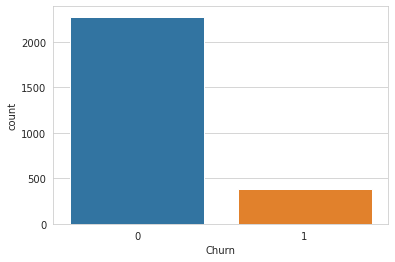

In [ ]:
# Let's Analyze Churn Column First
sns.countplot(x='Churn',data=df)

#### Our Dataset is Highly Imbalanced. So, we will Try to balance dataset using Over Sampling Method. 
---
**Note:**  we can not rely on only Accuracy Score if our dataset is imbalanced instead of that we should more focus to increase Precision and Recall Score.





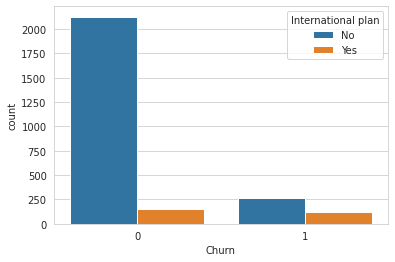

In [ ]:
# plot for knowing churn rate of cutomers who has international plan
sns.countplot(x='Churn',data=df,hue='International plan')

We can observe that customers who has international plan their churn rate is higher in compare to who hasn't international plan. 

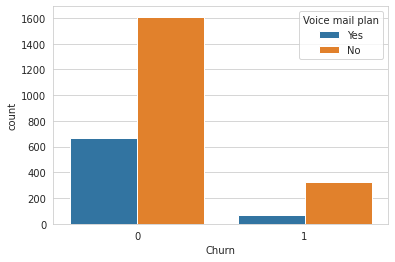

In [ ]:
# plot for knowing churn rate of cutomers who has voice mail plan
sns.countplot(x='Churn',data=df,hue='Voice mail plan')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


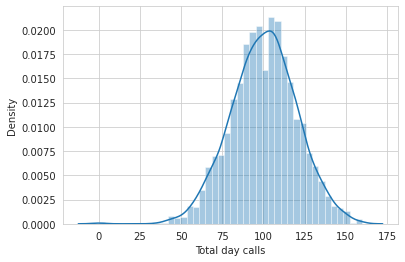

In [ ]:
# distribution of Total Day Calls
sns.distplot(df['Total day calls'])

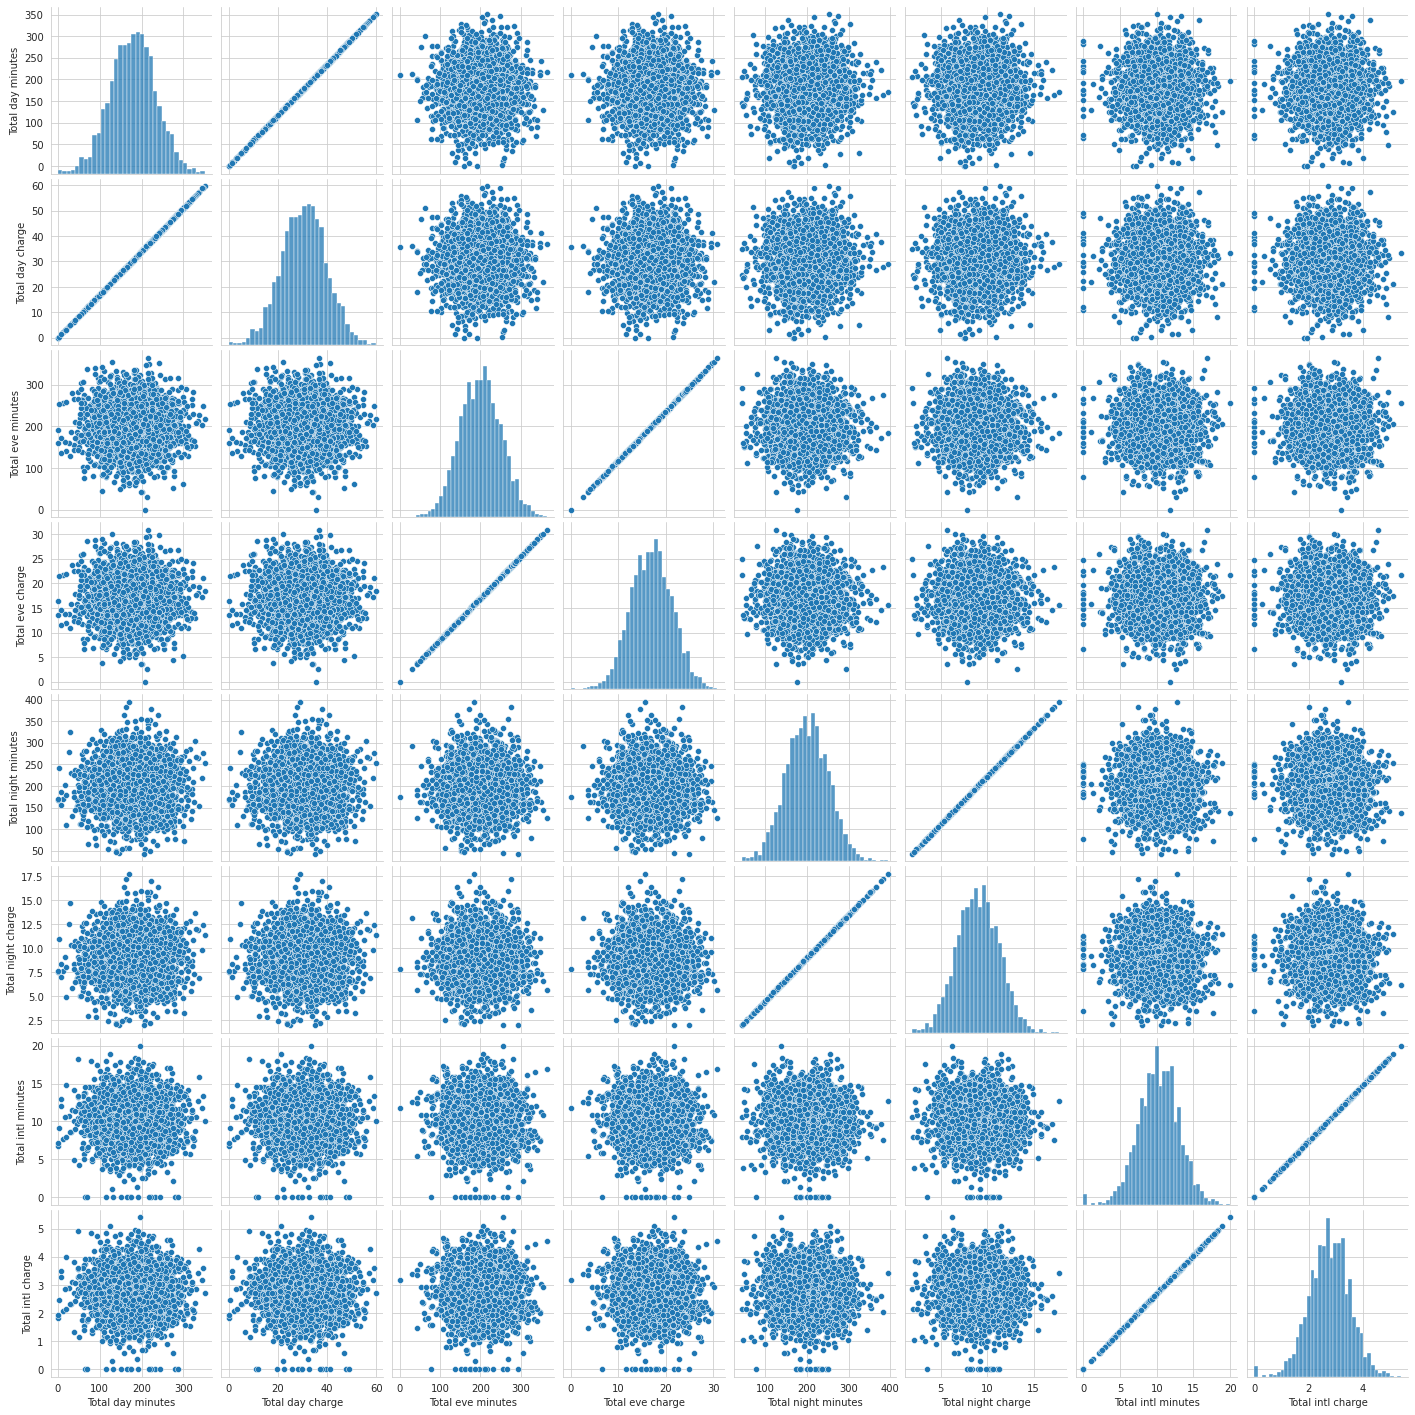

In [ ]:
# Pairplot between all the columns
sns.pairplot(df[df.select_dtypes("float").columns])

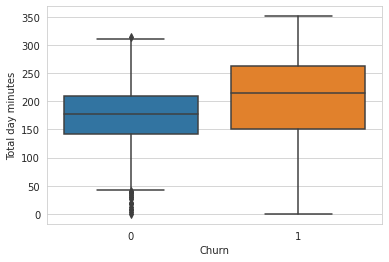

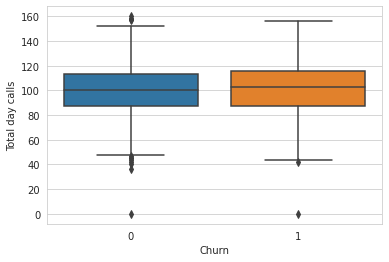

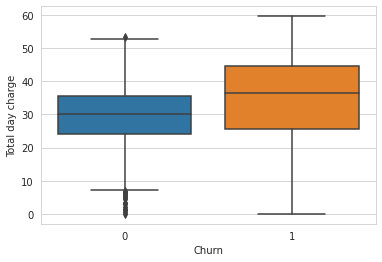

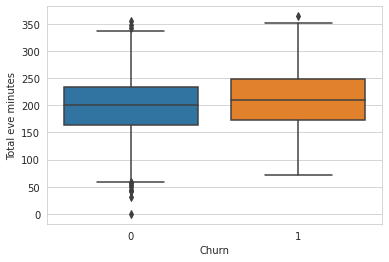

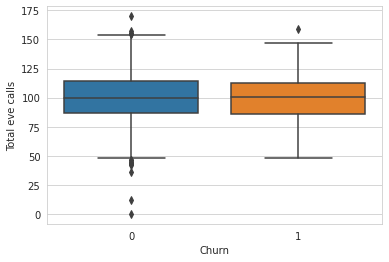

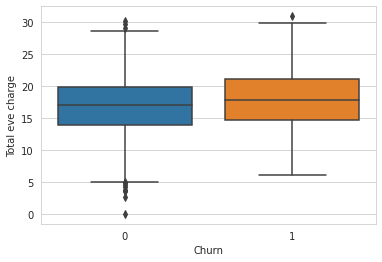

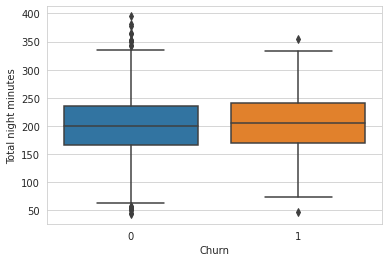

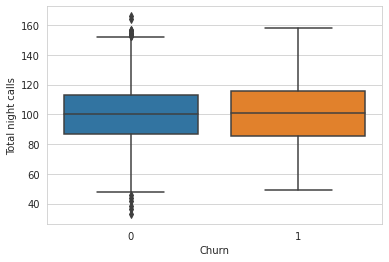

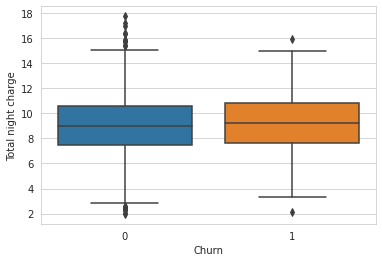

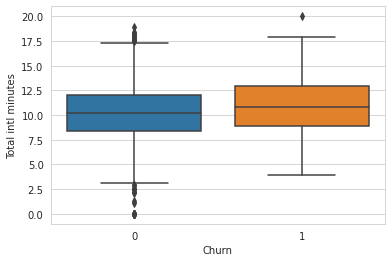

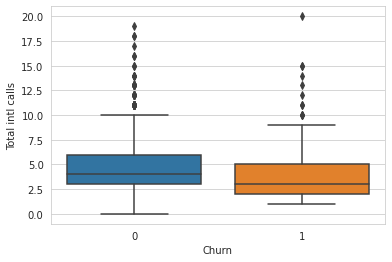

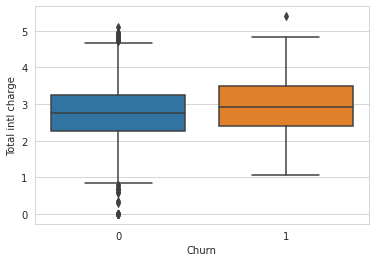

In [ ]:
# Let's plot boxplot for all columns
ls = ['Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls',
      'Total night charge','Total intl minutes','Total intl calls','Total intl charge']

for i in ls:
  sns.boxplot(x='Churn',y=i,data=df)
  plt.show()

# Train Test Split

In [ ]:
# Let's Extract Target and Independent Variables
X = df.drop('Churn',axis=1)
y = df['Churn']

In [ ]:
df[df['Churn']==0].shape,df[df['Churn']==1].shape

((2278, 20), (388, 20))

In [ ]:
# let's Balanced our dataset Using Random Over Sampling
from imblearn.over_sampling import RandomOverSampler

rd = RandomOverSampler(random_state=42)

X,y = rd.fit_resample(X,y)

In [ ]:
# required libraries
from sklearn.model_selection import train_test_split

In [ ]:
# train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,random_state=42)

In [ ]:
# Shape of train and test data
X_train.shape,X_test.shape

((3644, 19), (912, 19))

# Data Preprocessing

#### Let's do Feature Encoding on Categorical data
      
      1. State
      2. International Plan
      3. Voice mail Plan

In [ ]:
# import required libraries for Feature Encoding
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# object of Column Transformer for Encoding 
ct = ColumnTransformer([
  ("trf1",OneHotEncoder(sparse=False,drop='first'),['State','International plan','Voice mail plan']),
  ],remainder='passthrough')

# Create pipeline for data preparation
pipe = Pipeline(steps=[
      ('trf1',ct),
      ('trf2',StandardScaler())
])

In [ ]:
# fit column transformer object
X_train_trf = pipe.fit_transform(X_train)
X_test_trf = pipe.transform(X_test)
X_trf = pipe.transform(X)

# Best Model Searching

In [ ]:
# import required model and libraries
from sklearn.model_selection import cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

In [ ]:
models_list = [('lg',LogisticRegression()),('svm',SVC()),('dt',DecisionTreeClassifier()),('ada',AdaBoostClassifier()),
               ('knn',KNeighborsClassifier()),('naive_bays',GaussianNB()),('rf',RandomForestClassifier())]

for model_name,model in models_list:
  m = model.fit(X_train_trf,y_train)
  pred = m.predict(X_test_trf)
  acc_score = accuracy_score(y_test,pred)
  print(model_name,acc_score)

lg 0.7521929824561403
svm 0.8739035087719298
dt 0.9703947368421053
ada 0.8256578947368421
knn 0.8519736842105263
naive_bays 0.6458333333333334
rf 0.9923245614035088


We can clearly see that out of all models RandomForest and Decision Tree are giving us Very good Results.so,now we will try to do some hyperparameter tuning on our models to improve more to them.

In [ ]:
algos = {
    'rf':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[20,40,60,100],
            'criterion':['gini','entropy'],
            'max_depth':[10,20,30,50]
        }
    },
    'dt':{
        'model':DecisionTreeClassifier(),
        'params':{
            'criterion':['gini','entropy'],
            'max_depth':[10,20,30,50],
            'splitter':['best','random'],
        }
    },
}

scores = []
cv = ShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
for model_name,config in algos.items():
   gd = GridSearchCV(estimator=config['model'],param_grid=config['params'],cv=cv,return_train_score=False)
   gd.fit(X_trf,y)
   scores.append({'model_name':model_name,'best_score':gd.best_score_,'best_params':gd.best_params_})

pd.DataFrame(scores)

,model_name,best_score,best_params
0,rf,0.991118,"{'criterion': 'entropy', 'max_depth': 30, 'n_e..."
1,dt,0.969189,"{'criterion': 'entropy', 'max_depth': 30, 'spl..."


In [ ]:
# Let's Try to use Voting Classifier on decision tree using best parameters
from sklearn.ensemble import VotingClassifier

# list of models which 
model = [('dt1',DecisionTreeClassifier(criterion='entropy',max_depth=10,splitter='best')),
        ('dt2',DecisionTreeClassifier(criterion='gini',max_depth=10,splitter='random'))]

vt = VotingClassifier(estimators=model,voting='soft')

vt.fit(X_train_trf,y_train)

predi = vt.predict(X_test_trf)

cross_val_score(vt,X_trf,y,cv=cv).mean()

0.9531798245614036

Out of all the models. we can clearly see that RandomForest is giving us best result. so we are going to use RandomForest for our prediction.

# Model Building

In [ ]:
# creating object of model
rf = RandomForestClassifier(criterion='entropy',max_depth=30,n_estimators =40)

# Model Training
rf.fit(X_train_trf,y_train)

RandomForestClassifier(criterion='entropy', max_depth=30, n_estimators=40)

In [ ]:
# making prediction on train data
y_train_pred = rf.predict(X_train_trf)

# making prediction on test data
y_test_pred = rf.predict(X_test_trf)

In [ ]:
# function for scores
def check_score(y_actual,y_pred):
  acc_score = accuracy_score(y_actual,y_pred)
  pre_score = precision_score(y_actual,y_pred)
  rec_score = recall_score(y_actual,y_pred)
  f1score = f1_score(y_actual,y_pred)

  return pd.Series({'acc_score':acc_score,'pre_score':pre_score,'rec_score':rec_score,'f1':f1score})

In [ ]:
# Score on train data
check_score(y_train,y_train_pred)

acc_score    1.0
pre_score    1.0
rec_score    1.0
f1           1.0
dtype: float64

In [ ]:
# Score on test Data
check_score(y_test,y_test_pred)

acc_score    0.993421
pre_score    0.987013
rec_score    1.000000
f1           0.993464
dtype: float64

In [ ]:
# Finally Let's do Cross Validation 
cross_val_score(rf,X_trf,y,cv=cv).mean()

0.9898026315789474

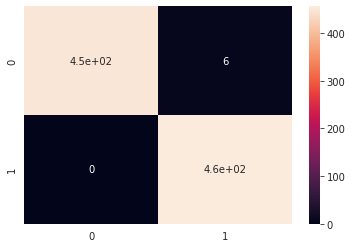

In [ ]:
# Confusion Matrix of model
con = confusion_matrix(y_test,y_test_pred)
sns.heatmap(con,annot=True)

### we are getting very good accuracy Score on test data around 0.99. So, we are ready to do prediction now.

In [ ]:
pip install -U notebook-as-pdf
pyppeteer-install
! jupyter-nbconvert --to PDFviaHTML HiteshCaseStudy.ipynb

[NbConvertApp] WARNING | pattern u'HiteshCaseStudy.ipynb' matched no files
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/jupyter_core/application.py", line 267, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/nbconvert/nbconvertapp.py", line 338, in start
    self.convert_notebooks()
  File "/usr/local/lib/python2.7/dist-packages/nbconvert/nbconvertapp.py", line 497, in convert_notebooks
    cls = get_exporter(self.export_format)
  File "/usr/local/lib/python2.7/dist-packages/nbconvert/exporters/base.py", line 113, in get_exporter
    % (name, ', '.join(get_export_names())))
ValueError: Unknown exporter "PDFviaHTML", did you mean one of: asciidoc, custom, h